In [2]:
import pandas as pd
from rdkit import Chem
from rdchiral.main import rdchiralReaction, rdchiralReactants, rdchiralRun
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('uspto_gram_t.csv')


In [4]:
# Predefined SMARTS templates for reaction classes
reaction_classes = {
    'oxidations': '[#6:1][#8:2]>>[#6:1]=[O:2]',  # Oxidation (e.g., alcohol to aldehyde/ketone)
    'reductions': '[#6:1]=[O:2]>>[#6:1][#8:2]',  # Reduction (e.g., ketone to alcohol)
    'acylation': '[C:1][C:2](=[O:3])Cl>>[C:1][C:2](=[O:3])[N:4]',  # Acylation (e.g., acyl group addition)
    'heterocycle_formation': 'C1=CC=CN1>>C1CN(C)C1',  # Heterocycle formation (simplified)
    'protections': '[#8:1][C:2]>>[#8:1][Si]',  # Example of protection (e.g., silyl ethers)
    'deprotections': '[#8:1][Si]>>[#8:1][C:2]',  # Deprotection
    'C-C_bond_formation': '[C:1][C:2]>>[C:1]-[C:2]',  # C-C bond formation
    'heteroatom_alkylation': '[N:1]>>[N:1][C]',  # Heteroatom alkylation (e.g., alkylation of nitrogen)
    'FGI': '[C:1][O:2]>>[C:1]=[C:3]',  # Functional group interconversion (e.g., alcohol to alkene)
    'FGA': '[C:1]>>[C:1][OH]',  # Functional group addition (e.g., hydroxyl addition)
    'resolutions': '[C@H:1]>>[C@@H:1]',  # Enantiomeric resolution
}

In [5]:
from tqdm import tqdm

# Initialize classification counts with 'unidentified' class added
classification_counts = {key: 0 for key in reaction_classes.keys()}
classification_counts['unidentified'] = 0  # Add a count for unidentified reactions

# Loop through reactions with progress bar
for reaction_smiles in tqdm(df['canonical_rxn'], desc="Classifying reactions"):
    try:
        # Ensure the SMILES format is valid for splitting into reactants and products
        reactants, products = reaction_smiles.split('>>')
    except ValueError:
        print(f"Skipping invalid reaction format: {reaction_smiles}")
        continue  # Skip to the next reaction if there's an issue with splitting

    valid_reaction_classified = False
    
    for class_name, template in reaction_classes.items():
        try:
            rxn = rdchiralReaction(template)
            reactants_smiles = rdchiralReactants(reactants)  # Reactants are passed as SMILES string
            
            # Apply the template to check if the reaction matches
            outcomes = rdchiralRun(rxn, reactants_smiles)
            
            if outcomes:
                classification_counts[class_name] += 1
                valid_reaction_classified = True
                break  # If matched, no need to check further
        except Exception as e:
            print(f"Error processing reaction {reaction_smiles} with template {class_name}: {e}")
    
    if not valid_reaction_classified:
        # Increment the count for unidentified reactions
        classification_counts['unidentified'] += 1
        #print(f"Reaction {reaction_smiles} could not be classified.")

# After processing, you can print the final counts or visualize them
print(classification_counts)


Classifying reactions:   4%|▎         | 3463/94991 [00:44<19:44, 77.27it/s] 


KeyboardInterrupt: 

{'oxidations': 12361, 'reductions': 62696, 'protections': 9037, 'C-C_bond_formation': 5744, 'heteroatom_alkylation': 1959, 'FGA': 1794, 'unidentified': 1400}


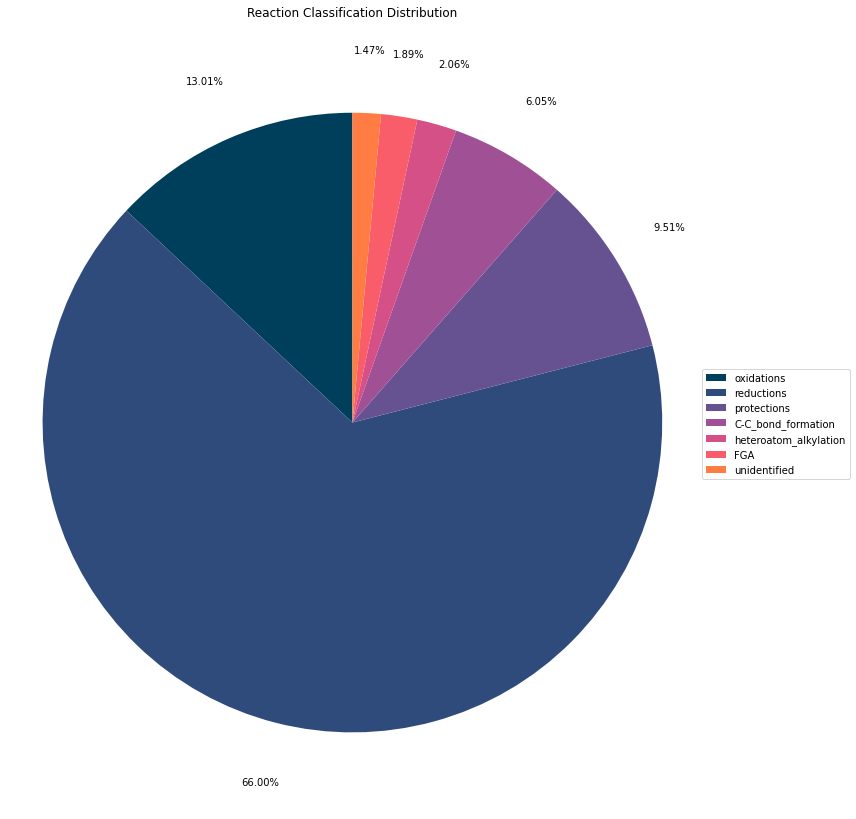

In [30]:
filtered_counts = {k: v for k, v in classification_counts.items() if v > 0}

# After processing, display classification counts
print(filtered_counts)

# Plotting the pie chart
labels = filtered_counts.keys()
sizes = filtered_counts.values()

labels = list(filtered_counts.keys())
sizes = list(filtered_counts.values())


colors = [
    '#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', 
    '#f95d6a', '#ff7c43', '#ffa600', '#4d9b72', '#ab9f54', 
    '#ff6b8b', '#a38a4d'
]

fig, ax = plt.subplots(figsize=(12, 12), facecolor='white')

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, colors=colors, startangle=90, autopct='%1.2f%%',
                                  pctdistance=1.2, textprops=dict(color="black"),
                                  wedgeprops=None)  # Full pie chart without wedge

# Adjust label positions using connection lines
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)  # Adjust font size
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', pad=1))  # Add white background to text
    # Draw the label lines if needed (use `explode` effect to slightly pull slices)
    if sizes[i] < 6:  # Adjust the threshold for when to draw lines
        texts[i].set_position((1.4 * texts[i].get_position()[0], 1.4 * texts[i].get_position()[1]))  # Pull the labels out

# Add a title
plt.title('Reaction Classification Distribution', pad=20)

# Add a legend outside the pie chart
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the pie chart
plt.show()

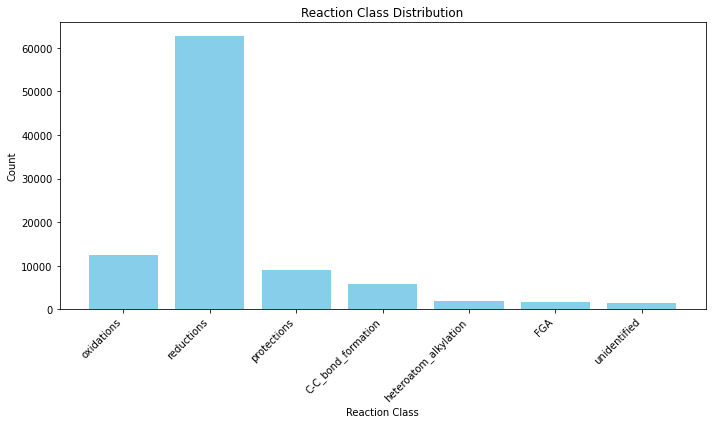

In [18]:
# Create a bar chart to visualize the classification
plt.figure(figsize=(10, 6))
plt.bar(filtered_counts.keys(), filtered_counts.values(), color='skyblue')
plt.title('Reaction Class Distribution')
plt.xlabel('Reaction Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

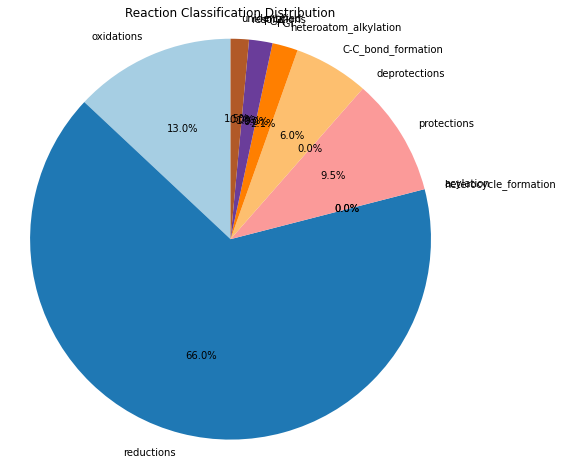

In [13]:
labels = classification_counts.keys()
sizes = classification_counts.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Reaction Classification Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [1]:
# Modifying the flowchart based on the new image uploaded by the user

fig, ax = plt.subplots(figsize=(8, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 12)

# Updated colors for different boxes
box_colors_updated = {
    "Dataset": "lightblue",
    "Model with Temp": "lightgreen",
    "Model without Temp": "lightgreen",
    "Modify Tokenizer": "lightyellow",
    "Original Tokenizer": "lightyellow",
    "MLM Task": "lightyellow",
    "Contrastive": "lightcoral",
    "Fine-Tune USPTO": "lightpink",
}

# Add text and arrows to create a flowchart similar to the updated image

# Dataset
ax.text(5, 11, "Dataset", ha='center', fontsize=12, bbox=dict(facecolor=box_colors_updated['Dataset'], edgecolor='black', boxstyle='round,pad=0.5'))

# Arrows from Dataset
ax.arrow(5, 10.8, -3, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.arrow(5, 10.8, 3, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')

# Left side flow (Model with Temp)
ax.text(2, 9, "Model\nwith Temp", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Model with Temp'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(2, 8.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(2, 7, "Modifying\nTokenizer", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Modify Tokenizer'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(2, 6.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(2, 5, "MLM Task", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['MLM Task'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(2, 4.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(2, 3, "Contrastive Learning", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Contrastive'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(2, 2.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(2, 1, "Fine-Tune\nUSPTO", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Fine-Tune USPTO'], edgecolor='black', boxstyle='round,pad=0.5'))

# Right side flow (Model without Temp)
ax.text(8, 9, "Model\nwithout Temp", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Model without Temp'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(8, 8.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(8, 7, "Original\nTokenizer", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Original Tokenizer'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(8, 6.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(8, 5, "MLM Task", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['MLM Task'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(8, 4.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(8, 3, "Contrastive Learning", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Contrastive'], edgecolor='black', boxstyle='round,pad=0.5'))
ax.arrow(8, 2.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(8, 1, "Fine-Tune\nUSPTO", ha='center', fontsize=10, bbox=dict(facecolor=box_colors_updated['Fine-Tune USPTO'], edgecolor='black', boxstyle='round,pad=0.5'))

# Horizontal line and fail arrow
ax.arrow(3, 3, 4, 0, head_width=0.3, head_length=0.2, fc='black', ec='black')
ax.text(5, 3.2, "failed", ha='center', fontsize=10)

# Hide axes
ax.axis('off')

# Display the flowchart
plt.show()


NameError: name 'plt' is not defined